In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
color=sns.color_palette()

C:\Users\Ravish\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
default=pd.read_csv('credit_card_defaulter.csv')

In [3]:
default

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.37891
9996,9997,No,No,757.962918,19660.72177
9997,9998,No,No,845.411989,58636.15698
9998,9999,No,No,1569.009053,36669.11236


In [4]:
default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [5]:
default.tail()

,Unnamed: 0,default,student,balance,income
9995,9996,No,No,711.555020,52992.37891
9996,9997,No,No,757.962918,19660.72177
9997,9998,No,No,845.411989,58636.15698
9998,9999,No,No,1569.009053,36669.11236
9999,10000,No,Yes,200.922183,16862.95232


In [6]:
default.shape

(10000, 5)

In [7]:
default.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462905
50%,5000.50000,823.636973,34552.644800
75%,7500.25000,1166.308387,43807.729275
max,10000.00000,2654.322576,73554.233500


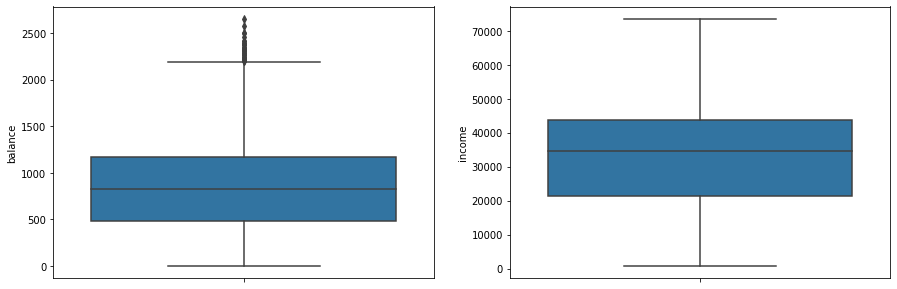

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=default['balance'])

plt.subplot(1,2,2)
sns.boxplot(y=default['income'])
plt.show()

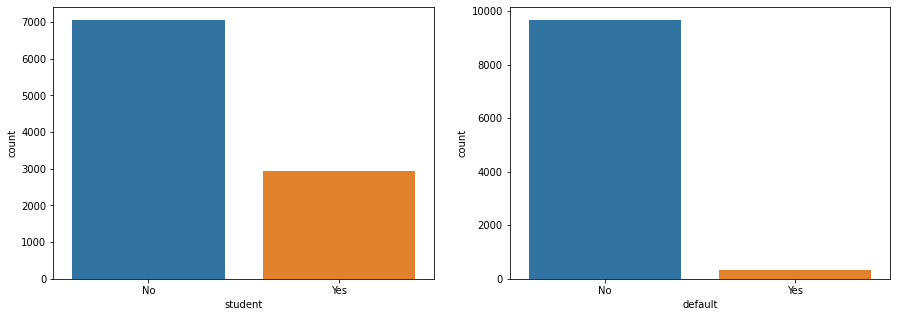

In [9]:
#now we are analyzing the categorical columns
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(default['student'])

plt.subplot(1,2,2)
sns.countplot(default['default'])
plt.show()

In [10]:
default['student'].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [11]:
default['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [12]:
default['student'].value_counts(normalize=True)

student
No     0.7056
Yes    0.2944
Name: proportion, dtype: float64

In [13]:
default['default'].value_counts(normalize=True)

default
No     0.9667
Yes    0.0333
Name: proportion, dtype: float64

In [14]:
#till now we were doing univariate method, means we are analyzing one column at a time.

In [15]:
#Now we are doing a Bivariate method

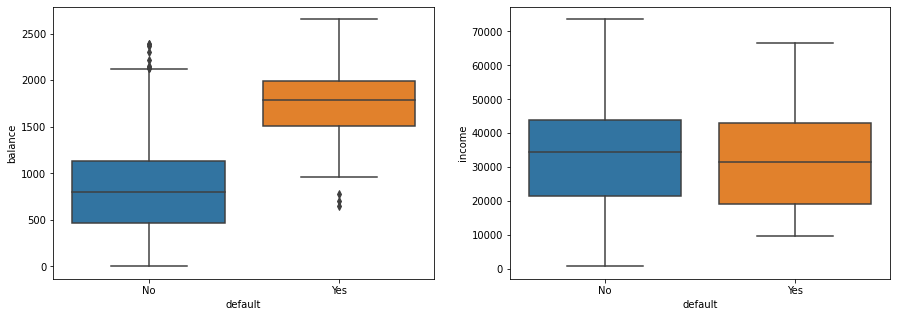

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(default['default'],default['balance'])

plt.subplot(1,2,2)
sns.boxplot(default['default'],default['income'])
plt.show()

In [17]:
# do a Cross tabulation

In [18]:
pd.crosstab(default['student'],default['default'],normalize='index')

default,No,Yes
student,,
No,0.970805,0.029195
Yes,0.956861,0.043139


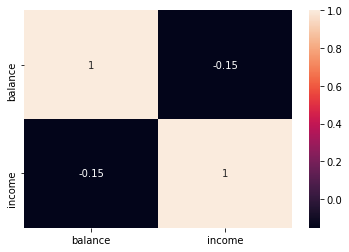

In [19]:
sns.heatmap(default[['balance','income']].corr(),annot=True)
plt.show()

In [20]:
default.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [21]:
Q1,Q3=default['balance'].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR)
UL=Q3+1.5*(IQR)

In [22]:
UL # after 2193.17 the upper outlier will start

2193.1743093

In [23]:
LL # after -545.13 the lower outlier starts

-545.1348175

In [24]:
df=default[default['balance']>UL]

In [25]:
df

,Unnamed: 0,default,student,balance,income
173,174,Yes,Yes,2205.799521,14271.492250
1136,1137,Yes,No,2499.016750,51504.293960
1160,1161,Yes,Yes,2502.684931,14947.519750
1359,1360,Yes,No,2220.966201,40725.096210
1502,1503,Yes,Yes,2332.878254,11770.234120
1609,1610,Yes,Yes,2269.946966,18021.105950
2096,2097,Yes,Yes,2261.848162,20030.165120
2140,2141,No,Yes,2308.893236,19110.266410
2929,2930,Yes,Yes,2387.314867,28296.914720
3162,3163,Yes,Yes,2415.316994,17429.503370


In [26]:
df['default'].count()

31

In [27]:
df['default'].value_counts(normalize=True)

default
Yes    0.83871
No     0.16129
Name: proportion, dtype: float64

In [28]:
df['default'].value_counts()

default
Yes    26
No      5
Name: count, dtype: int64

In [29]:
default['balance']=np.where(default['balance']>UL,UL,default['balance'])

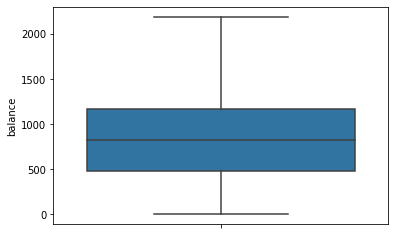

In [30]:
sns.boxplot(y=default['balance'])
plt.show()

In [31]:
default=pd.get_dummies(default)

In [32]:
default.head()

,Unnamed: 0,balance,income,default_No,default_Yes,student_No,student_Yes
0,1,729.526495,44361.62507,True,False,True,False
1,2,817.180407,12106.13470,True,False,False,True
2,3,1073.549164,31767.13895,True,False,True,False
3,4,529.250605,35704.49394,True,False,True,False
4,5,785.655883,38463.49588,True,False,True,False


In [34]:
default.head()

,Unnamed: 0,balance,income,default_No,default_Yes,student_No,student_Yes
0,1,729.526495,44361.62507,True,False,True,False
1,2,817.180407,12106.13470,True,False,False,True
2,3,1073.549164,31767.13895,True,False,True,False
3,4,529.250605,35704.49394,True,False,True,False
4,5,785.655883,38463.49588,True,False,True,False


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X=default.drop('default_Yes',axis=1)
y=default['default_Yes']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [38]:
print(X_train.shape)
print(X_test.shape)

(7000, 6)
(3000, 6)


In [39]:
print(y_train.value_counts(normalize=True).round(2))
print(y_test.value_counts(normalize=True).round(2))

default_Yes
False    0.97
True     0.03
Name: proportion, dtype: float64
default_Yes
False    0.97
True     0.03
Name: proportion, dtype: float64


In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr=LogisticRegression()

In [42]:
lr.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred=lr.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
cm=confusion_matrix(y_test,y_pred)

In [46]:
#now we are finding the Accuracy of model
# AM=((LD/LD+RD))
AM=(2897+3)/(2897+3+3+97)

In [47]:
AM

0.9666666666666667

In [48]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)

[[2900    0]
 [   0  100]]
Accuracy score: 1.0


In [49]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [50]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix
                                          =confusion_matrix,display_labels=[False,True])

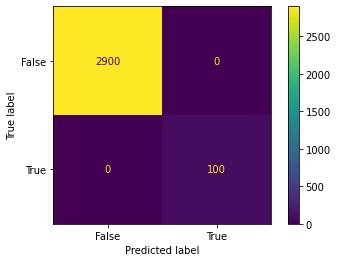

In [51]:
cm_display.plot()
plt.show()